In [1]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
from datapoint_load import *
from scipy.special import softmax

In [39]:
Y = get_all_chekpoints('dyskinesia_LeftUpperLimb')
np.unique(Y)

feature: dyskinesia_LeftUpperLimb
read: 

/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-10.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-100.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1000.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1001.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1002.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1003.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1004.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1005.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1006.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-

array(['0', '1', '2', '3'], dtype='<U1')

In [3]:
indices = np.where(Y == 'NotApplicable')
Y = np.delete(Y,indices)
Y[Y == 'Yes'] = 1
Y[Y == '2'] = 1
Y[Y == '3'] = 1
Y[Y == '4'] = 1
Y[Y == 'No'] = 0
np.unique(Y)

array(['0', '1'], dtype='<U13')

In [25]:
#50HZ-datapoints 
x1 = get_all_chekpoints('leftWrist_X')
y1 = get_all_chekpoints('leftWrist_Y')
z1 = get_all_chekpoints('leftWrist_Z')

feature: leftWrist_X
read: 

/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-10.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-100.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1000.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1001.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1002.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1003.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1004.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1005.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1006.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3

In [26]:
#RMS connects x, y, z
X1 = acc_rms(x1,y1,z1)
#X1 = np.delete(X1,indices,axis = 0)
print(X1.shape)
print('number of points:', X1.shape[0], '\t', 'points of dimensions:', X1.shape[1])

(6453, 250)
number of points: 6453 	 points of dimensions: 250


In [27]:
#25HZ-datapoints 
x2 = get_all_chekpoints_reduce('leftWrist_X',reduce = 2)
y2 = get_all_chekpoints_reduce('leftWrist_Y',reduce = 2)
z2 = get_all_chekpoints_reduce('leftWrist_Z',reduce = 2)

feature: leftWrist_X
read: 

/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-10.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-100.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1000.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1001.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1002.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1003.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1004.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1005.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1006.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3

In [28]:
#RMS connects x, y, z
X2 = acc_rms(x2,y2,z2)
#X2 = np.delete(X2,indices,axis = 0)
print(X2.shape)
print('number of points:', X2.shape[0], '\t', 'points of dimensions:', X2.shape[1])

(6453, 125)
number of points: 6453 	 points of dimensions: 125


In [29]:
#10Hz-datapoint
x3 = get_all_chekpoints_reduce('leftWrist_X',reduce = 5)
y3 = get_all_chekpoints_reduce('leftWrist_Y',reduce = 5)
z3 = get_all_chekpoints_reduce('leftWrist_Z',reduce = 5)

feature: leftWrist_X
read: 

/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-10.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-100.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1000.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1001.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1002.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1003.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1004.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1005.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1006.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3

In [30]:
#RMS connects x, y, z
X3 = acc_rms(x3,y3,z3)
#X3 = np.delete(X3,indices,axis = 0)
print(X3.shape)
print('number of points:', X3.shape[0], '\t', 'points of dimensions:', X3.shape[1])

(6453, 50)
number of points: 6453 	 points of dimensions: 50


In [10]:
#10Hz-datapoint
x4 = get_all_chekpoints_reduce('leftWrist_X',reduce = 10)
y4 = get_all_chekpoints_reduce('leftWrist_Y',reduce = 10)
z4 = get_all_chekpoints_reduce('leftWrist_Z',reduce = 10)

feature: leftWrist_X
read: 

/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-10.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-100.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1000.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1001.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1002.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1003.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1004.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1005.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3_BOS-shimmer-1006.torch
/home/stian/code/codetest/data3/shimmer_data_windowsz-5_overlap-1/3

In [31]:
#RMS connects x, y, z
X4 = acc_rms(x4,y4,z4)
#X4 = np.delete(X4,indices,axis = 0)
print(X4.shape)
print('number of points:', X4.shape[0], '\t', 'points of dimensions:', X4.shape[1])


(6453, 25)
number of points: 6453 	 points of dimensions: 25


In [40]:
#Original sampling rate: 50HZ：X1
#Lower sampling rate of 25Hz, 10Hz, 5HZ respectivel
#25HZ: X2
#10HZ:X3
#5Hz:X4


Y = Y.astype(int)
Y = Y.reshape(len(Y),-1)

print('Y:','number of points', Y.shape[0])
print('classes of Y:',np.unique(Y))
print('X1:', 'number of points:', X1.shape[0], '\t', 'points of dimensions:', X1.shape[1])
print('X2:', 'number of points:', X2.shape[0], '\t', 'points of dimensions:', X2.shape[1])
print('X3:', 'number of points:', X3.shape[0], '\t', 'points of dimensions:', X3.shape[1])
print('X4:', 'number of points:', X4.shape[0], '\t', 'points of dimensions:', X4.shape[1])

print(X1.shape)

Y: number of points 6453
classes of Y: [0 1 2 3]
X1: number of points: 6453 	 points of dimensions: 250
X2: number of points: 6453 	 points of dimensions: 125
X3: number of points: 6453 	 points of dimensions: 50
X4: number of points: 6453 	 points of dimensions: 25
(6453, 250)


In [41]:
from sklearn import neighbors
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [42]:
# K-NN Classifiation
#Y = Y.reset_index(drop=True)
#Classifiation X1 and Y
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y, test_size = 0.25, random_state = 1)
knn_clf = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', algorithm = 'ball_tree', metric = 'minkowski')
knn_clf.fit(X1_train, Y1_train)

# predict Y
Y1_pred = knn_clf.predict(X1_test)

result1 = classification_report(Y1_test, Y1_pred)
print('Classification Report:',)
print(result1)

Accuracy1 = accuracy_score(Y1_test, Y1_pred)
print('Accuracy:', Accuracy1)

proba_YX1 = knn_clf.predict_proba (X1_test)

Y1_idx = Y1_test.astype(int)
proba_YX1_c = []
for i, y_idx in enumerate(Y1_idx):
    proba_YX1_c += proba_YX1[i, y_idx].tolist()

#Classifiation X2 and Y
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y, test_size = 0.25, random_state = 1)
knn_clf = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform', algorithm = 'ball_tree', metric = 'minkowski')
knn_clf.fit(X2_train, Y2_train)

# predict Y
Y2_pred = knn_clf.predict(X2_test)

result2 = classification_report(Y2_test, Y2_pred)
print('Classification Report:',)
print(result2)

Accuracy2 = accuracy_score(Y2_test, Y2_pred)
print('Accuracy:', Accuracy1)

proba_YX2 = knn_clf.predict_proba (X2_test)
Y2_idx = Y2_test.astype(int)
proba_YX2_c = []
for i, y_idx in enumerate(Y2_idx):
    proba_YX2_c += proba_YX2[i, y_idx].tolist()

#Classifiation X3 and Y
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y, test_size = 0.25, random_state = 1)
knn_clf = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform', algorithm = 'ball_tree', metric = 'minkowski')
knn_clf.fit(X3_train, Y3_train)

# predict Y
Y3_pred = knn_clf.predict(X3_test)

result3 = classification_report(Y3_test, Y3_pred)
print('Classification Report:',)
print(result3)

Accuracy3 = accuracy_score(Y3_test, Y3_pred)
print('Accuracy:', Accuracy3)

proba_YX3 = knn_clf.predict_proba (X3_test)
Y3_idx = Y3_test.astype(int)
proba_YX3_c = []
for i, y_idx in enumerate(Y3_idx):
    proba_YX3_c += proba_YX3[i, y_idx].tolist()

#Classifiation X4 and Y
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4,Y, test_size = 0.25, random_state = 1)
knn_clf = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform', algorithm = 'ball_tree', metric = 'minkowski')
knn_clf.fit(X4_train, Y4_train)

# predict Y
Y4_pred = knn_clf.predict(X4_test)

result4 = classification_report(Y4_test, Y4_pred)
print('Classification Report:',)
print(result1)

Accuracy4 = accuracy_score(Y4_test, Y4_pred)
print('Accuracy:', Accuracy4)

proba_YX4 = knn_clf.predict_proba (X4_test)
Y4_idx = Y4_test.astype(int)
proba_YX4_c = []
for i, y_idx in enumerate(Y4_idx):
    proba_YX4_c += proba_YX4[i, y_idx].tolist()
    

/home/stian/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1295
           1       0.29      0.17      0.21       237
           2       0.51      0.24      0.33        82

    accuracy                           0.79      1614
   macro avg       0.55      0.45      0.48      1614
weighted avg       0.74      0.79      0.76      1614

Accuracy: 0.7856257744733581


/home/stian/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1295
           1       0.27      0.16      0.20       237
           2       0.49      0.29      0.37        82

    accuracy                           0.79      1614
   macro avg       0.54      0.46      0.49      1614
weighted avg       0.74      0.79      0.76      1614

Accuracy: 0.7856257744733581


/home/stian/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1295
           1       0.22      0.08      0.11       237
           2       0.55      0.28      0.37        82

    accuracy                           0.79      1614
   macro avg       0.53      0.44      0.46      1614
weighted avg       0.73      0.79      0.75      1614

Accuracy: 0.79182156133829


/home/stian/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1295
           1       0.29      0.17      0.21       237
           2       0.51      0.24      0.33        82

    accuracy                           0.79      1614
   macro avg       0.55      0.45      0.48      1614
weighted avg       0.74      0.79      0.76      1614

Accuracy: 0.8079306071871127


In [43]:
#Approximating Integrals with Monte Carlo
import sys
n_sample = X1.shape[0]
labellist = np.unique(Y)

#Monte Carlo approximation
a1 = -1 * np.log2(proba_YX1_c)
a1[np.isinf(a1)] = 0 

a2 = -1 * np.log2(proba_YX2_c)
a2[np.isinf(a2)] = 0 

a3 = -1 * np.log2(proba_YX3_c)
a3[np.isinf(a3)] = 0 

a4 = -1 * np.log2(proba_YX4_c)
a4[np.isinf(a4)] = 0 



def monte_carlo(a):
    n_sample = a.shape[0]
    h = np.sum(a) / n_sample
    return h 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log2
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()


In [44]:
# entropy H(Y|X)

#50HZ
#H1_tremor = monte_carlo(a1)

#25HZ
# = monte_carlo(a2)

#10HZ
#H3_tremor = monte_carlo(a3)

#5HZ
#H4_tremor = monte_carlo(a4)
#print(H1,H2,H3,H4)

#50HZ
#H1_bradykinesia = monte_carlo(a1)

#25HZ
#H2_bradykinesia  = monte_carlo(a2)

#10HZ
#H3_bradykinesia  = monte_carlo(a3)

#5HZ
#H4_bradykinesia  = monte_carlo(a4)

#50HZ
H1_dyskinesia = monte_carlo(a1)

#25HZ
H2_dyskinesia = monte_carlo(a2)

#10HZ
H3_dyskinesia = monte_carlo(a3)

#5HZ
H4_dyskinesia = monte_carlo(a4)

In [45]:
#Loss of Information
Loss1_dyskinesia = H2_dyskinesia  - H1_dyskinesia 
Loss2_dyskinesia = H3_dyskinesia  - H1_dyskinesia 
Loss3_dyskinesia = H4_dyskinesia  - H1_dyskinesia 

#Loss1_tremor  = H2_tremor  - H1_tremor
#Loss2_tremor  = H3_tremor  - H1_tremor
#Loss3_tremor  = H4_tremor  - H1_tremor

#Loss1_bradykinesia = H2_bradykinesia - H1_bradykinesia 
#Loss2_bradykinesia = H3_bradykinesia - H1_bradykinesia 
#Loss3_bradykinesia = H4_bradykinesia - H1_bradykinesia 

In [47]:
Loss_dyskinesia = [0,Loss1_dyskinesia , Loss2_dyskinesia , Loss3_dyskinesia ]
Loss_tremor = [0, Loss1_tremor, Loss2_tremor, Loss3_tremor]
#Accuracy = [ round(Accuracy4 * 100,2) , round(Accuracy3 * 100,2), round(Accuracy2 * 100,2), round(Accuracy1 * 100,2)]
#reduce_frequency = [5,10,25,50]

Loss_bradykinesia = [0,Loss1_bradykinesia,Loss2_bradykinesia,Loss3_bradykinesia]
Loss_frequency = [0,25,40,45]

print(Loss_bradykinesia)
print(Loss_dyskinesia)
print(Loss_tremor)

[0, 0.2101629898655765, 0.3427228480162978, 0.4745854048942312]
[0, 0.1751413644652256, 0.22814861456055385, 0.26900442767079213]
[0, 0.35210794595099326, 0.5587796785242459, 0.7026864381066892]


/home/stian/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/stian/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/stian/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/stian/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

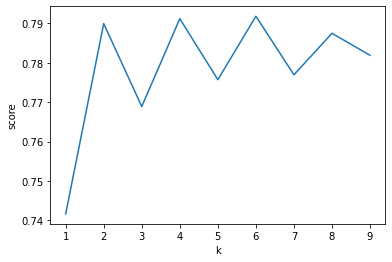

In [58]:
score = []
krange = range(1,10)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(X3_train, Y3_train)
    score.append(clf.score(X3_test,Y3_test))
    
plt.plot(krange, score)
plt.xlabel('k')
plt.ylabel('score')
plt.xticks(krange)
plt.show()

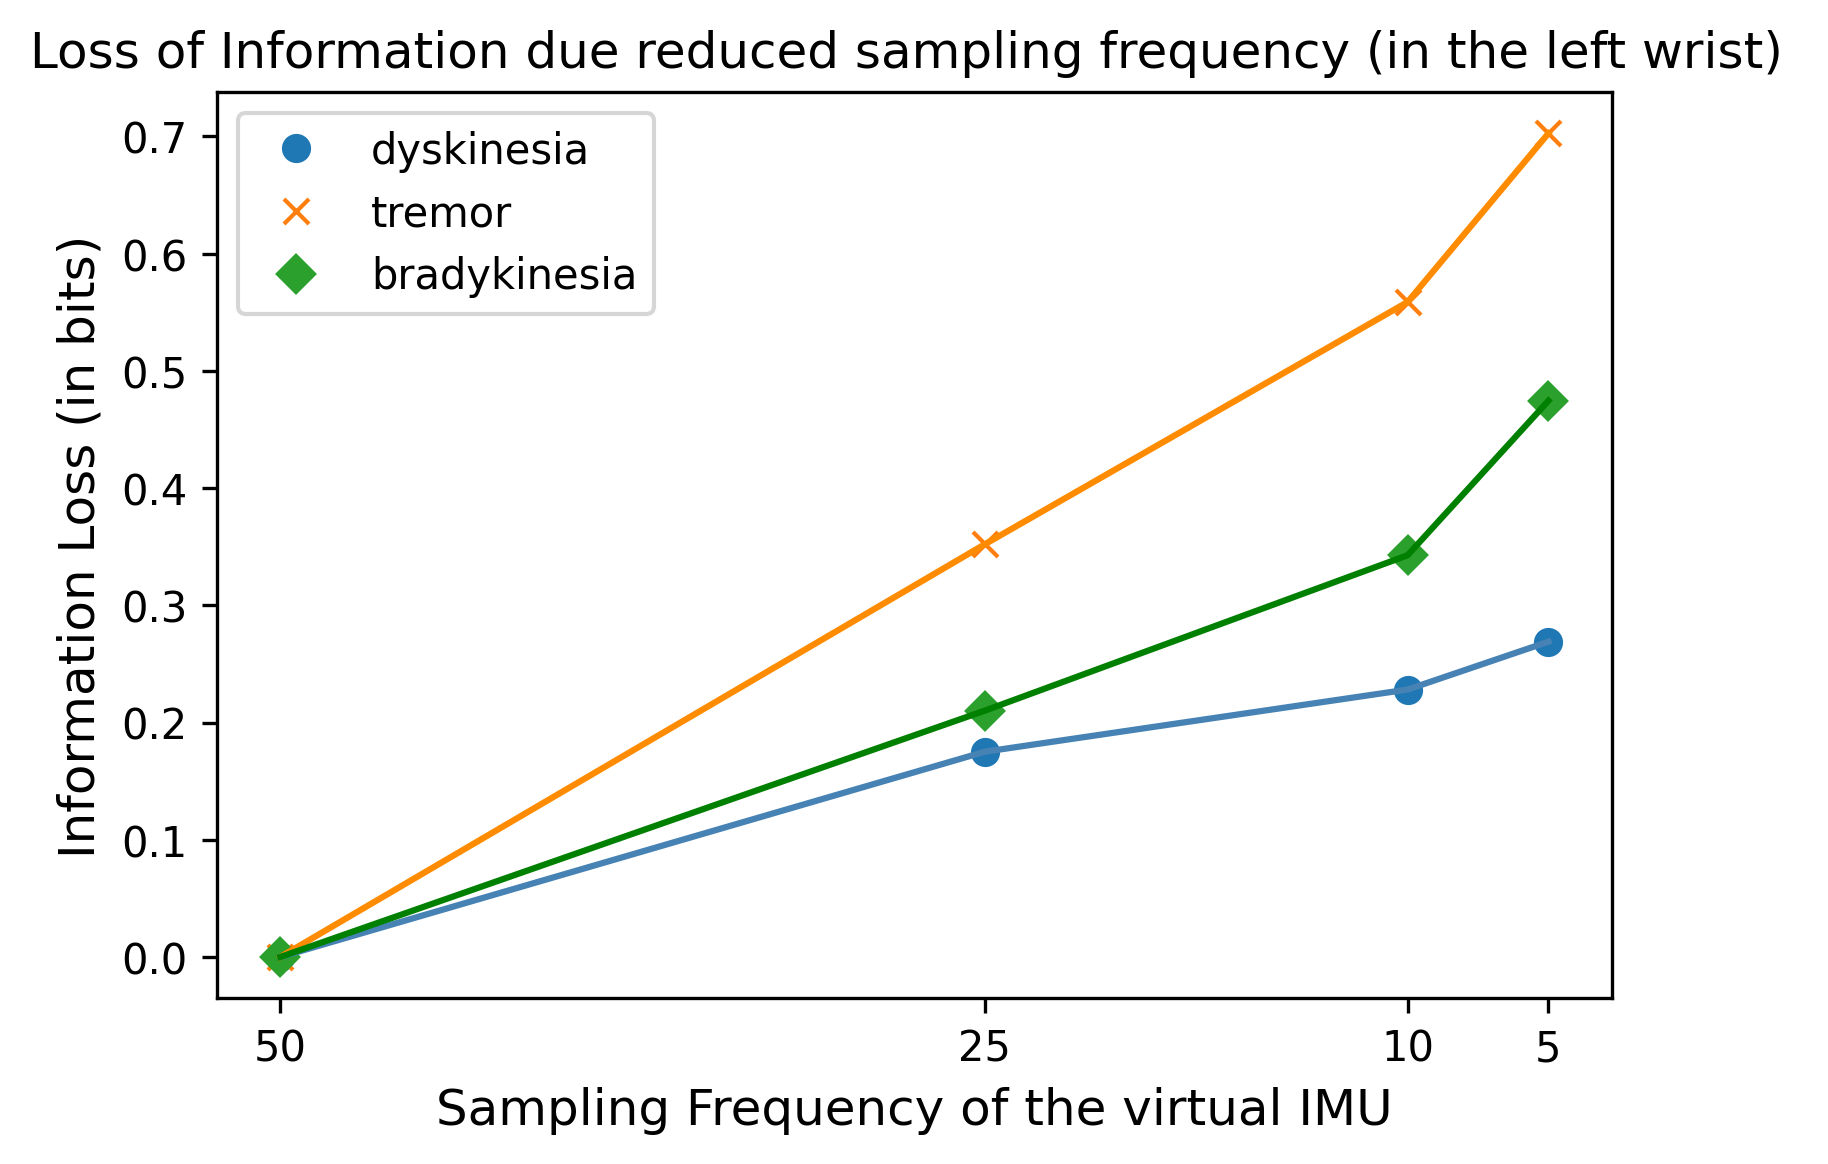

In [79]:
import matplotlib as mpl
Loss_bradykinesia = [0,Loss1_bradykinesia,Loss2_bradykinesia,Loss3_bradykinesia]
Loss_dyskinesia = [0,Loss1_dyskinesia , Loss2_dyskinesia , Loss3_dyskinesia ]
Loss_tremor = [0,Loss1_tremor,Loss2_tremor, Loss3_tremor]
Loss_frequency = [50,25,10,5]

ax = plt.gca() 
l1 = plt.plot( Loss_frequency,Loss_dyskinesia, 'o',label='dyskinesia')
l2 = plt.plot(Loss_frequency, Loss_tremor, 'x',label='tremor')
l3 = plt.plot(Loss_frequency, Loss_bradykinesia,'D',label='bradykinesia')
plt.plot(Loss_frequency, Loss_dyskinesia,'steelblue',Loss_frequency, Loss_tremor,'darkorange',Loss_frequency,Loss_bradykinesia,'green')

#values = range(len(Loss_frequency))

plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300
ax.invert_xaxis()
plt.xticks(Loss_frequency)
plt.title('Loss of Information due reduced sampling frequency (in the left wrist) ')
plt.xlabel('Sampling Frequency of the virtual IMU', fontsize = 12)
plt.ylabel('Information Loss (in bits)', fontsize = 12)
plt.legend()
plt.savefig('/home/stian/code/codetest/figureff/bradykinesia_dyskinesia_tremor_leftwrist9763',dpi= 300)
plt.show()
